In [95]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

# Change root directory
dirPath = r'C:\Users\Andreas\Desktop\Thesis\Data'
os.chdir(dirPath)
print('Current working directory: {0}'.format(os.getcwd()))

Current working directory: C:\Users\Andreas\Desktop\Thesis\Data


In [96]:
def read_csv(dirPath = dirPath, sample = 'all', exercise = 'all', sensor = 'all'):
    root = dirPath+'\\'+'Synchronized'
    df = pd.DataFrame()

    for samplefolder in os.listdir(root):
        if sample in samplefolder or sample == 'all':

            for exercisefolder in os.listdir(root+'\\'+samplefolder):
                if exercise in exercisefolder or exercise == 'all':
                    
                    for file in os.listdir(root+'\\'+samplefolder+'\\'+exercisefolder):
                        if sensor in file or sensor == 'all' and '.csv' in file:
                    
                            csv_path = root+'\\'+samplefolder+'\\'+exercisefolder+'\\'+file
                            data = pd.read_csv(csv_path, delimiter=',', encoding = 'utf-8')
                            df = pd.concat([df, data], ignore_index=True)
    return df

In [97]:
df  = read_csv(dirPath = dirPath, sample = '11', exercise = 'B', sensor = 'Chest_Acc')

In [98]:
# Rep detection
def detect_repetitions(df):

    data = df[['x','y','z']]

    # Normalize the data
    data_norm = data
    # data_norm = (data - data.mean()) / data.std()

    # Initialize K-means clustering algorithm
    kmeans = KMeans(n_clusters=1)

    # Fit the data to the K-means algorithm
    kmeans.fit(data_norm)

    # Find the cluster centers
    centers = kmeans.cluster_centers_

    # Euclidian distance
    distances = np.zeros(data_norm.shape[0])
    for i in range(data_norm.shape[0]):
        distances[i] = np.sqrt(np.sum((data_norm.iloc[i] - centers[kmeans.labels_[i]])**2))

    # Boundaries from local minima
    rep_boundaries = np.where((distances[:-1] < distances[1:]) & (distances[:-1] < distances[1:].std()/10))[0]

    return rep_boundaries


c:\Users\Andreas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


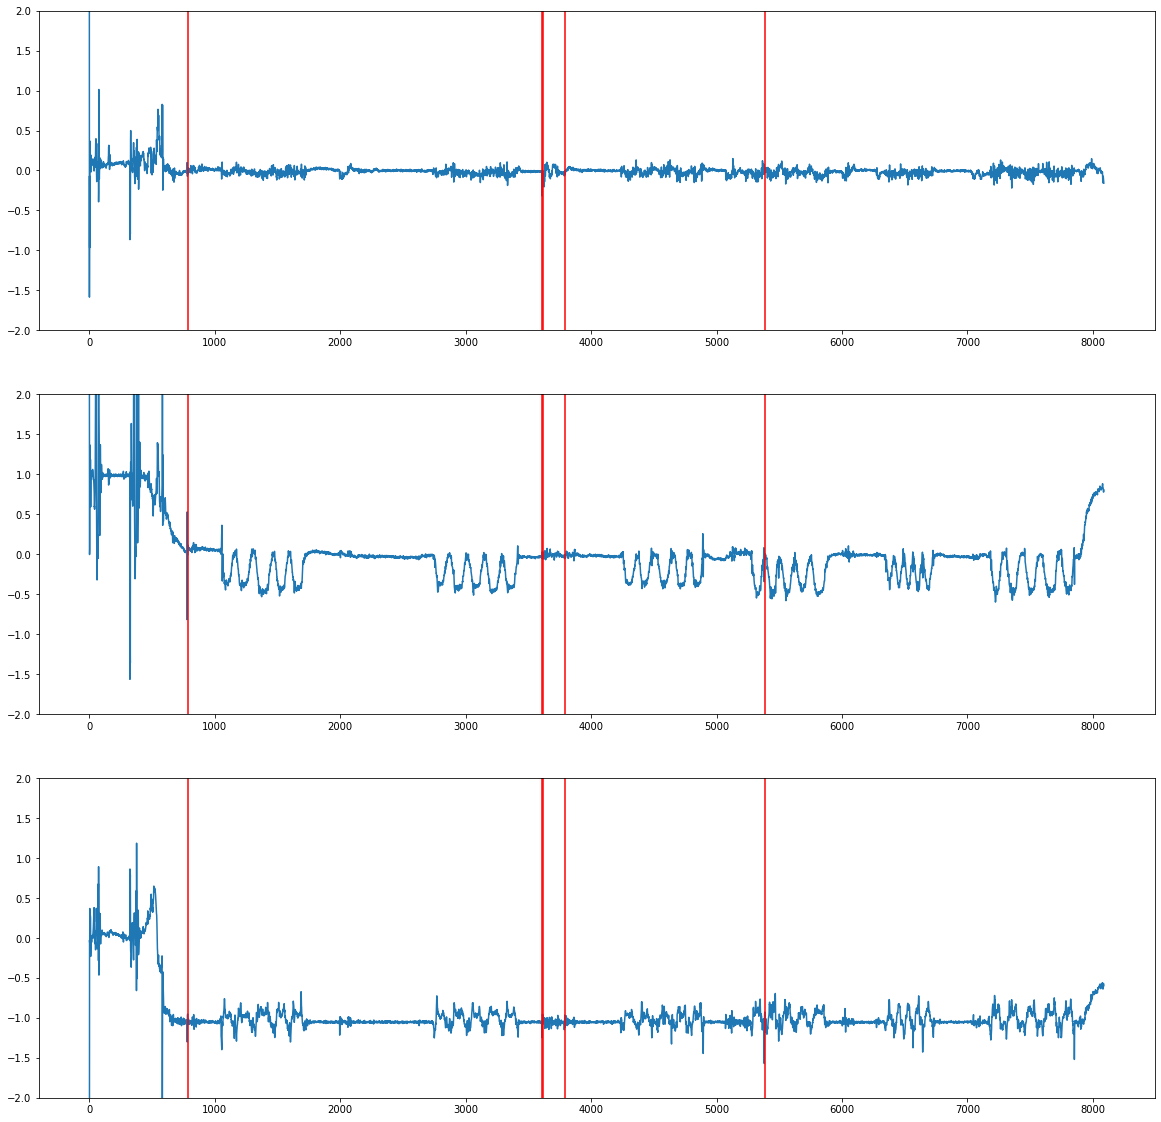

In [99]:
rep_boundaries = detect_repetitions(df)

# Plot the IMU data
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
df.x.plot(ax=ax[0])
df.y.plot(ax=ax[1])
df.z.plot(ax=ax[2])

# Plot the repetition boundaries as vertical lines
for boundary in rep_boundaries:
    for i in range(3):
        ax[i].axvline(x=boundary, linestyle='-', color='r')
        ax[i].set_ylim(-2,2)